<a href="https://colab.research.google.com/github/Hironobu-Kawaguchi/StatisticsWorkbook/blob/main/statwb06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

統計検定準1級対応　統計学実践ワークブック
# 第6章　連続型分布と標本分布

## 連続一様分布

## 正規分布

## 指数分布

## ガンマ分布

## ベータ分布

## コーシー分布

## 対数正規分布

## 2変量正規分布、多変量正規分布

## 混合正規分布

## カイ二乗分布（非心分布を含む）

## $t$分布（非心分布を含む）

## $F$分布（非心分布を含む）

## 例題

### 問6.1
あるテストの受験者は全部で1000人であり、受験者全体でのテストの得点の分布は正規分布 $N(65,10^2)$ で近似できるとする。このテストで$A$君は85点、$B$君は60点であった。なお、標準正規分布 $N(0,1)$ の確率密度関数は $f(z) = \frac{1}{\sqrt{2 \pi}} \exp (-z^2 / 2)$ である。  
(1) $A$君および$B$君の偏差値はいくらか。  
(2) $A$君の得点と$B$君の得点の間に入る受験者の人数はおおよそ何人か。  
(3) このテストの全受験者の得点の箱ひげ図を描いた場合、四分位範囲（箱の長さ）はいくらか。  
(4) このテストで65点以上の受験者のみを集めた場合、彼・彼女らの得点の平均値はおおよそいくらか。

### 答6.1
(1)  
(2)  
(3)  
(4)  

64.6175345688016 9.933484408503967


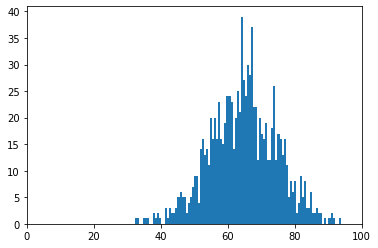

(1) A: 70.0 B: 45.0


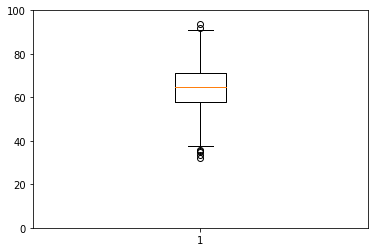

In [29]:
import numpy as np
import matplotlib.pyplot as plt
N = 1000
# N = 10000000
AVERAGE = 65
STD = 10
A = 85
B = 60
x = np.random.randn(N) * STD + AVERAGE
print(x.mean(), x.std())
plt.hist(x, bins=101)
plt.xlim(0,100)
plt.show()
print("(1)", "A:", (A-AVERAGE)/STD*10+50, "B:", (B-AVERAGE)/STD*10+50)

plt.boxplot(x)
plt.ylim(0,100)
plt.show()